# Jupyter Notebook

Jupyter is just a wrapper for Python code. It comes with a lot of convenience tools though. There are two main modes which you can be in:
    - Edit mode: Typing code or markdown,
    - Command mode: where you can select cells and run them

Every jupyter session starts fresh. So you can run cells when you open the notebook. You can either run each individually by pressing SHIFT+Enter on the highlighted cell, or run all cells. The cell tab at the top gives you these options. Expore the options in the tab, there are not many of them, but they will be used often enough

# Bringing data into python: The Difficult way

Jorge has been working on a problem where he takes point data generated from mimics and determines distance information. The first thing that needs to be done is to take this in and parse out the numerical data. We will do that using python's file library.

In [1]:
f = open('./data/RCA_Test_Spline.txt', 'r') #I have saved a file in the data folder.
#'r' is for reading files. We can write files too. We won't need to do that here.
#and we will rarely ever have to do that.

The file object here is sort of like a promise to read a document. You can read the whole thing or you can read line by line. But if you decide to read the first line, it will tell you the second line if you do a read line a gain. In this way, a file object is one that both can return values to you while changing its state.

In [2]:
print(f.readline())

Legend



In [3]:
print(f.readline())

In [4]:
print(f.read()) #Notice how This does not tell you about 'Legend' and 
#'=====' because that has already been read


Spline:
Name:          Name of the spline
Xp,Yp,Zp:      Coordinates of point P on spline

Data
====

Spline:
Name: RCA
X0 Y0 Z0: 27.31  12.30  18.66 
X1 Y1 Z1: 26.40  13.08  19.79 
X2 Y2 Z2: 24.85  14.08  21.45 
X3 Y3 Z3: 23.65  14.55  22.67 
X4 Y4 Z4: 22.20  15.08  24.27 
X5 Y5 Z5: 20.75  15.38  25.75 
X6 Y6 Z6: 19.00  15.29  26.93 
X7 Y7 Z7: 17.32  15.12  28.21 
X8 Y8 Z8: 15.74  14.86  29.15 
X9 Y9 Z9: 13.90  12.97  29.75 
X10 Y10 Z10: 12.23  12.48  30.84 
X11 Y11 Z11: 10.02  11.84  32.11 
X12 Y12 Z12: 7.04   10.40  34.03 
X13 Y13 Z13: 4.97   8.80   35.26 
X14 Y14 Z14: 2.77   6.61   35.89 
X15 Y15 Z15: 0.58   4.38   36.66 
X16 Y16 Z16: -1.45  3.06   37.11 
X17 Y17 Z17: -4.09  0.52   37.05 
X18 Y18 Z18: -6.47  -0.76  37.95 
X19 Y19 Z19: -7.70  -4.25  37.12 
X20 Y20 Z20: -10.36 -6.29  38.10 
X21 Y21 Z21: -11.24 -9.54  36.88 
X22 Y22 Z22: -12.26 -11.09 36.93 
X23 Y23 Z23: -14.42 -11.16 36.55 
X24 Y24 Z24: -15.76 -12.52 36.12 
X25 Y25 Z25: -15.99 -14.75 34.92 
X26 Y26 Z26: -17.34 -16.1

In [5]:
f.read() #There is nothing more left to read

''

In [6]:
f.close() #Let's close the file before we read it again so
#we can free up any memory that python may be reserving still for the file

In [7]:
f = open('./data/RCA_Test_Spline.txt', 'r')

In [8]:
#There are a lot of ways we could go about picking the lines we need.
#Using regular expressions is one possibility.
#We are going to take a naive approach and just take the lines that have
#X's in them
ls = []
for line in f:
    #In a file object, python makes this equivalent to doing each readline
    if 'X' in line:
        ls.append(line)

For loops are great and everything, but I don't like them very much. I will replace them with list comprehensions whenever I can because it looks so much better and makes me make less variables. So let's do that instead.

In [9]:
f = open('./data/RCA_Test_Spline.txt', 'r')
points = [line for line in f if 'X' in line]
f.close()

In [10]:
points

['Xp,Yp,Zp:      Coordinates of point P on spline\n',
 'X0 Y0 Z0: 27.31  12.30  18.66 \n',
 'X1 Y1 Z1: 26.40  13.08  19.79 \n',
 'X2 Y2 Z2: 24.85  14.08  21.45 \n',
 'X3 Y3 Z3: 23.65  14.55  22.67 \n',
 'X4 Y4 Z4: 22.20  15.08  24.27 \n',
 'X5 Y5 Z5: 20.75  15.38  25.75 \n',
 'X6 Y6 Z6: 19.00  15.29  26.93 \n',
 'X7 Y7 Z7: 17.32  15.12  28.21 \n',
 'X8 Y8 Z8: 15.74  14.86  29.15 \n',
 'X9 Y9 Z9: 13.90  12.97  29.75 \n',
 'X10 Y10 Z10: 12.23  12.48  30.84 \n',
 'X11 Y11 Z11: 10.02  11.84  32.11 \n',
 'X12 Y12 Z12: 7.04   10.40  34.03 \n',
 'X13 Y13 Z13: 4.97   8.80   35.26 \n',
 'X14 Y14 Z14: 2.77   6.61   35.89 \n',
 'X15 Y15 Z15: 0.58   4.38   36.66 \n',
 'X16 Y16 Z16: -1.45  3.06   37.11 \n',
 'X17 Y17 Z17: -4.09  0.52   37.05 \n',
 'X18 Y18 Z18: -6.47  -0.76  37.95 \n',
 'X19 Y19 Z19: -7.70  -4.25  37.12 \n',
 'X20 Y20 Z20: -10.36 -6.29  38.10 \n',
 'X21 Y21 Z21: -11.24 -9.54  36.88 \n',
 'X22 Y22 Z22: -12.26 -11.09 36.93 \n',
 'X23 Y23 Z23: -14.42 -11.16 36.55 \n',
 'X24 Y24 Z24: -

In [11]:
#That worked fine, let's get rid of 
stripped_points = [point.strip() for point in points[1:]]
stripped_points

['X0 Y0 Z0: 27.31  12.30  18.66',
 'X1 Y1 Z1: 26.40  13.08  19.79',
 'X2 Y2 Z2: 24.85  14.08  21.45',
 'X3 Y3 Z3: 23.65  14.55  22.67',
 'X4 Y4 Z4: 22.20  15.08  24.27',
 'X5 Y5 Z5: 20.75  15.38  25.75',
 'X6 Y6 Z6: 19.00  15.29  26.93',
 'X7 Y7 Z7: 17.32  15.12  28.21',
 'X8 Y8 Z8: 15.74  14.86  29.15',
 'X9 Y9 Z9: 13.90  12.97  29.75',
 'X10 Y10 Z10: 12.23  12.48  30.84',
 'X11 Y11 Z11: 10.02  11.84  32.11',
 'X12 Y12 Z12: 7.04   10.40  34.03',
 'X13 Y13 Z13: 4.97   8.80   35.26',
 'X14 Y14 Z14: 2.77   6.61   35.89',
 'X15 Y15 Z15: 0.58   4.38   36.66',
 'X16 Y16 Z16: -1.45  3.06   37.11',
 'X17 Y17 Z17: -4.09  0.52   37.05',
 'X18 Y18 Z18: -6.47  -0.76  37.95',
 'X19 Y19 Z19: -7.70  -4.25  37.12',
 'X20 Y20 Z20: -10.36 -6.29  38.10',
 'X21 Y21 Z21: -11.24 -9.54  36.88',
 'X22 Y22 Z22: -12.26 -11.09 36.93',
 'X23 Y23 Z23: -14.42 -11.16 36.55',
 'X24 Y24 Z24: -15.76 -12.52 36.12',
 'X25 Y25 Z25: -15.99 -14.75 34.92',
 'X26 Y26 Z26: -17.34 -16.15 34.48',
 'X27 Y27 Z27: -17.72 -17.70 33

In [12]:
[point.split() for point in stripped_points]
#[point.split()[3:] for point in stripped_points]
#or
points = [point.strip().split()[3:] for point in points[1:]] #Chain chain chain chain...

In [13]:
#Nested for list comprehension
ls = []
for point in points:
    ls.append([])
    for coord in point:
        ls[-1].append(float(coord))

ls
#[[float(coord) for coord in point] for point in points]

[[27.31, 12.3, 18.66],
 [26.4, 13.08, 19.79],
 [24.85, 14.08, 21.45],
 [23.65, 14.55, 22.67],
 [22.2, 15.08, 24.27],
 [20.75, 15.38, 25.75],
 [19.0, 15.29, 26.93],
 [17.32, 15.12, 28.21],
 [15.74, 14.86, 29.15],
 [13.9, 12.97, 29.75],
 [12.23, 12.48, 30.84],
 [10.02, 11.84, 32.11],
 [7.04, 10.4, 34.03],
 [4.97, 8.8, 35.26],
 [2.77, 6.61, 35.89],
 [0.58, 4.38, 36.66],
 [-1.45, 3.06, 37.11],
 [-4.09, 0.52, 37.05],
 [-6.47, -0.76, 37.95],
 [-7.7, -4.25, 37.12],
 [-10.36, -6.29, 38.1],
 [-11.24, -9.54, 36.88],
 [-12.26, -11.09, 36.93],
 [-14.42, -11.16, 36.55],
 [-15.76, -12.52, 36.12],
 [-15.99, -14.75, 34.92],
 [-17.34, -16.15, 34.48],
 [-17.72, -17.7, 33.09],
 [-17.59, -19.83, 31.34],
 [-17.03, -22.5, 30.07],
 [-17.42, -24.78, 29.26],
 [-17.2, -27.02, 28.09],
 [-16.89, -29.09, 26.77],
 [-16.24, -30.99, 25.36],
 [-15.33, -32.48, 23.73],
 [-14.68, -34.07, 22.07],
 [-13.82, -35.26, 19.99],
 [-13.13, -36.33, 18.02],
 [-12.48, -36.79, 15.88],
 [-11.09, -37.52, 13.65],
 [-9.19, -38.44, 11.2],

In [14]:
#This is the sum total of everything we've done so far.
def extract_data(point_file_path):
    f = open(point_file_path, 'r')
    #This is the bad line. Should probably be regex
    #We are just being lazy.
    points = [line for line in f if 'X' in line]
    f.close()
    points = [point.strip().split()[3:] for point in points[1:]]
    points = [[float(coord) for coord in point] for point in points]
    return points

extracted_points = extract_data('./data/RCA_Test_Spline.txt')
extracted_points

[[27.31, 12.3, 18.66],
 [26.4, 13.08, 19.79],
 [24.85, 14.08, 21.45],
 [23.65, 14.55, 22.67],
 [22.2, 15.08, 24.27],
 [20.75, 15.38, 25.75],
 [19.0, 15.29, 26.93],
 [17.32, 15.12, 28.21],
 [15.74, 14.86, 29.15],
 [13.9, 12.97, 29.75],
 [12.23, 12.48, 30.84],
 [10.02, 11.84, 32.11],
 [7.04, 10.4, 34.03],
 [4.97, 8.8, 35.26],
 [2.77, 6.61, 35.89],
 [0.58, 4.38, 36.66],
 [-1.45, 3.06, 37.11],
 [-4.09, 0.52, 37.05],
 [-6.47, -0.76, 37.95],
 [-7.7, -4.25, 37.12],
 [-10.36, -6.29, 38.1],
 [-11.24, -9.54, 36.88],
 [-12.26, -11.09, 36.93],
 [-14.42, -11.16, 36.55],
 [-15.76, -12.52, 36.12],
 [-15.99, -14.75, 34.92],
 [-17.34, -16.15, 34.48],
 [-17.72, -17.7, 33.09],
 [-17.59, -19.83, 31.34],
 [-17.03, -22.5, 30.07],
 [-17.42, -24.78, 29.26],
 [-17.2, -27.02, 28.09],
 [-16.89, -29.09, 26.77],
 [-16.24, -30.99, 25.36],
 [-15.33, -32.48, 23.73],
 [-14.68, -34.07, 22.07],
 [-13.82, -35.26, 19.99],
 [-13.13, -36.33, 18.02],
 [-12.48, -36.79, 15.88],
 [-11.09, -37.52, 13.65],
 [-9.19, -38.44, 11.2],

In [15]:
import re
#that's not going to work for TV_spline.
#So sad, we have to use regular expressions now
g = open('./data/TV_Spline.txt')
for line in g:
    print(re.findall(r'(-?\d+\.\d+)', line))
g.close()


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['-58.52', '49.08', '3.66']
['-59.23', '47.90', '4.33']
['-59.84', '46.47', '5.44']
['-60.32', '45.18', '6.70']
['-60.84', '44.11', '7.96']
['-61.93', '42.85', '9.83']
['-62.96', '42.24', '11.02']
['-64.62', '41.68', '12.45']
['-66.29', '41.24', '13.67']
['-67.48', '40.83', '14.55']
['-69.04', '40.05', '15.77']
['-70.15', '39.33', '16.64']
['-71.28', '38.57', '17.40']
['-72.63', '37.78', '18.04']
['-73.87', '37.24', '18.37']
['-75.31', '36.83', '18.51']
['-76.77', '36.58', '18.54']
['-78.22', '36.43', '18.56']
['-79.37', '36.33', '18.64']
['-80.93', '36.18', '18.87']
['-82.34', '36.06', '19.10']
['-84.00', '36.00', '19.18']
['-85.07', '36.07', '19.00']
['-86.22', '36.31', '18.49']
['-87.26', '36.77', '17.58']
['-87.86', '37.31', '16.63']
['-88.28', '38.22', '15.28']
['-88.44', '39.96', '13.58']
['-88.67', '42.07', '12.70']
['-89.08', '43.62', '12.52']
['-89.61', '44.84', '12.58']
['-90.37', '45.99', '12.79']
['-91.31', '47.01', '13.06']
['-92.30', '4

In [16]:
def extract_data(point_file_path):
    f = open(point_file_path, 'r')
    points = [re.findall(r'(-?\d+\.\d+)', line) for line in f]
    points = [i for i in points if i != []]    
    points = [[float(coord) for coord in point] for point in points]
    return points

extracted_points = extract_data('./data/TV_Spline.txt')
extracted_points

[[-58.52, 49.08, 3.66],
 [-59.23, 47.9, 4.33],
 [-59.84, 46.47, 5.44],
 [-60.32, 45.18, 6.7],
 [-60.84, 44.11, 7.96],
 [-61.93, 42.85, 9.83],
 [-62.96, 42.24, 11.02],
 [-64.62, 41.68, 12.45],
 [-66.29, 41.24, 13.67],
 [-67.48, 40.83, 14.55],
 [-69.04, 40.05, 15.77],
 [-70.15, 39.33, 16.64],
 [-71.28, 38.57, 17.4],
 [-72.63, 37.78, 18.04],
 [-73.87, 37.24, 18.37],
 [-75.31, 36.83, 18.51],
 [-76.77, 36.58, 18.54],
 [-78.22, 36.43, 18.56],
 [-79.37, 36.33, 18.64],
 [-80.93, 36.18, 18.87],
 [-82.34, 36.06, 19.1],
 [-84.0, 36.0, 19.18],
 [-85.07, 36.07, 19.0],
 [-86.22, 36.31, 18.49],
 [-87.26, 36.77, 17.58],
 [-87.86, 37.31, 16.63],
 [-88.28, 38.22, 15.28],
 [-88.44, 39.96, 13.58],
 [-88.67, 42.07, 12.7],
 [-89.08, 43.62, 12.52],
 [-89.61, 44.84, 12.58],
 [-90.37, 45.99, 12.79],
 [-91.31, 47.01, 13.06],
 [-92.3, 47.85, 13.3],
 [-93.38, 48.68, 13.5],
 [-94.25, 49.42, 13.59],
 [-95.21, 50.48, 13.56],
 [-95.8, 51.58, 13.36],
 [-96.1, 53.06, 12.89],
 [-95.98, 54.8, 12.13],
 [-95.88, 56.15, 11.

# Numpy

Numpy is the core of fast matrix computing in Python. Lists in python are too slow to do lots of math with. Numpy save data in contiguous memory and uses a fast C++ backend to make everything fast. As an example we will use Jorge's problem of finding the closest point between to point sets.

In [17]:
import numpy as np
#It is easy to convert a list of values like this,
#Into a numpy array. Simply pass it into the np.array method,
#and now it will be a numpy array object with all its
#own methods.
points_np = np.array(extracted_points)
points_np

array([[ -5.85200000e+01,   4.90800000e+01,   3.66000000e+00],
       [ -5.92300000e+01,   4.79000000e+01,   4.33000000e+00],
       [ -5.98400000e+01,   4.64700000e+01,   5.44000000e+00],
       [ -6.03200000e+01,   4.51800000e+01,   6.70000000e+00],
       [ -6.08400000e+01,   4.41100000e+01,   7.96000000e+00],
       [ -6.19300000e+01,   4.28500000e+01,   9.83000000e+00],
       [ -6.29600000e+01,   4.22400000e+01,   1.10200000e+01],
       [ -6.46200000e+01,   4.16800000e+01,   1.24500000e+01],
       [ -6.62900000e+01,   4.12400000e+01,   1.36700000e+01],
       [ -6.74800000e+01,   4.08300000e+01,   1.45500000e+01],
       [ -6.90400000e+01,   4.00500000e+01,   1.57700000e+01],
       [ -7.01500000e+01,   3.93300000e+01,   1.66400000e+01],
       [ -7.12800000e+01,   3.85700000e+01,   1.74000000e+01],
       [ -7.26300000e+01,   3.77800000e+01,   1.80400000e+01],
       [ -7.38700000e+01,   3.72400000e+01,   1.83700000e+01],
       [ -7.53100000e+01,   3.68300000e+01,   1.8510000

In [18]:
#We can change our method to return a numpy array instead.
def extract_data_np(point_file_path):
    f = open(point_file_path, 'r')
    points = [re.findall(r'(-?\d+\.\d+)', line) for line in f]
    points = [i for i in points if i != []]    
    points = np.array(points).astype(float) #We like this much better
    return points

extract_data_np('./data/RCA_Test_Spline.txt')

array([[ 27.31,  12.3 ,  18.66],
       [ 26.4 ,  13.08,  19.79],
       [ 24.85,  14.08,  21.45],
       [ 23.65,  14.55,  22.67],
       [ 22.2 ,  15.08,  24.27],
       [ 20.75,  15.38,  25.75],
       [ 19.  ,  15.29,  26.93],
       [ 17.32,  15.12,  28.21],
       [ 15.74,  14.86,  29.15],
       [ 13.9 ,  12.97,  29.75],
       [ 12.23,  12.48,  30.84],
       [ 10.02,  11.84,  32.11],
       [  7.04,  10.4 ,  34.03],
       [  4.97,   8.8 ,  35.26],
       [  2.77,   6.61,  35.89],
       [  0.58,   4.38,  36.66],
       [ -1.45,   3.06,  37.11],
       [ -4.09,   0.52,  37.05],
       [ -6.47,  -0.76,  37.95],
       [ -7.7 ,  -4.25,  37.12],
       [-10.36,  -6.29,  38.1 ],
       [-11.24,  -9.54,  36.88],
       [-12.26, -11.09,  36.93],
       [-14.42, -11.16,  36.55],
       [-15.76, -12.52,  36.12],
       [-15.99, -14.75,  34.92],
       [-17.34, -16.15,  34.48],
       [-17.72, -17.7 ,  33.09],
       [-17.59, -19.83,  31.34],
       [-17.03, -22.5 ,  30.07],
       [-1

In [19]:
rca_spline = extract_data_np('./data/RCA_Test_Spline.txt')
tv_spline = extract_data_np('./data/TV_Spline.txt')

<IPython.core.display.Javascript object>


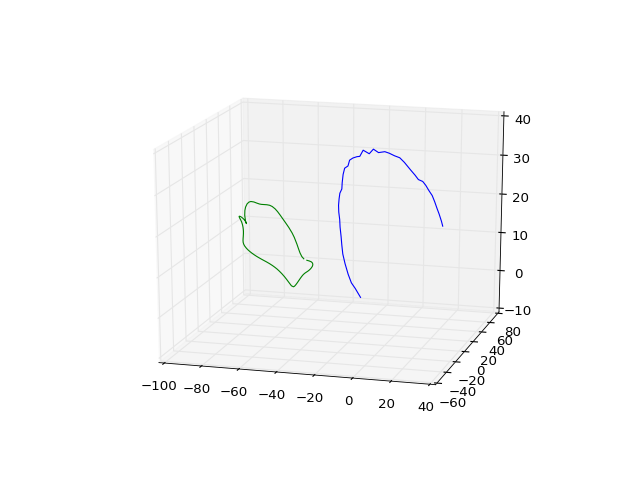

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(rca_spline[:,0], rca_spline[:,1], rca_spline[:,2])
ax.plot(tv_spline[:,0], tv_spline[:,1], tv_spline[:,2])
plt.show()

Remember that this is the hard way of doing things. Mimics returns files that are not easily parsable, but list comprehensions make dealing with this a fairly easy process. When we get more structured data, like a csv, the pandas library will be able to create a tabular data object for us in one line. For data like this though, it makes more sense to keep it as a numpy array. You don't have fields that you need to query or match up to anything else, you just care about the math behind it.

In [21]:
rca_spline + tv_spline

ValueError: operands could not be broadcast together with shapes (44,3) (96,3) 

In [22]:
rca_spline[0:10, 0]

array([ 27.31,  26.4 ,  24.85,  23.65,  22.2 ,  20.75,  19.  ,  17.32,
        15.74,  13.9 ])

In [23]:
rca_spline[:,:].shape #This doesn't change anything, just asks for everything

(44, 3)

In [24]:
rca_spline[:, None, :].shape, tv_spline[None,:,:].shape #Insert a dimension of size one into the arrays

((44, 1, 3), (1, 96, 3))

In [25]:
disp_vec_mat = (rca_spline[:, None, :] - tv_spline[None,:,:]) #Magical operation
disp_vec_mat.shape

(44, 96, 3)

In [26]:
dist_mat = np.sqrt((disp_vec_mat ** 2).sum(axis=-1))
dist_mat.shape

(44, 96)

In [27]:
#minimum distance is:
print(dist_mat.argmin(0).argmin())
print(dist_mat.argmin(1).argmin())

0
6


# Broadcasting

In [28]:
arr = np.arange(16).reshape(8,2)
arr.shape

(8, 2)

In [29]:
const = np.array([2])
const.shape

(1,)

In [30]:
(arr + const).shape

(8, 2)

In [31]:
vec = np.array([3,4])
vec.shape

(2,)

In [32]:
arr + vec #makes sense

array([[ 3,  5],
       [ 5,  7],
       [ 7,  9],
       [ 9, 11],
       [11, 13],
       [13, 15],
       [15, 17],
       [17, 19]])

In [33]:
arr + np.array([1,2,3])

ValueError: operands could not be broadcast together with shapes (8,2) (3,) 

In [34]:
def broacast_op(arr1, arr2):
    return np.sqrt( ((arr1[:,None,:] - arr2[None,:,:])**2).sum(axis=-1) )

%timeit -n10 broacast_op(rca_spline, tv_spline)

10 loops, best of 3: 111 µs per loop


In [35]:
import numba
broadcast_op_numb = numba.jit(broacast_op)

%timeit -n10 broadcast_op_numb(rca_spline, tv_spline)

The slowest run took 124.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 111 µs per loop


In [43]:
dist_mat.argmin(0)

array([18, 18, 18, 18, 18, 18, 18, 18, 18, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], dtype=int64)

# Let's actually do this problem, but more organized.

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [92]:
def displacement(a,b):
    return a[:,None,:] - b[None,:,:]

def distance(a, b):
    return np.sqrt( ( displacement(a,b)**2).sum(axis=-1) )

def spline_plot(spline_a, spline_b):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(spline_a[:,0], spline_a[:,1], spline_a[:,2])
    ax.plot(spline_b[:,0], spline_b[:,1], spline_b[:,2])
    plt.show()
    
def spline_plot(spline_a, spline_b, vecs=None):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(spline_a[:,0], spline_a[:,1], spline_a[:,2])
    ax.plot(spline_b[:,0], spline_b[:,1], spline_b[:,2])
    if (vecs != None).any():
        for i in range(vec.shape[0]):
            line 
            ax.plot(
    plt.show()

<IPython.core.display.Javascript object>


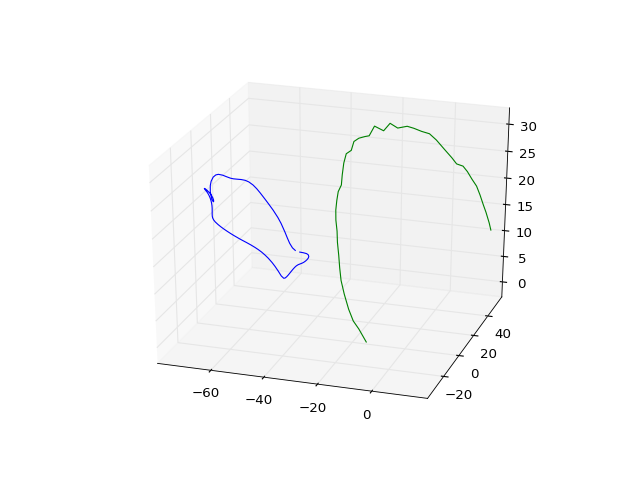

In [93]:
spline_plot(tv_spline, rca_spline)

<IPython.core.display.Javascript object>


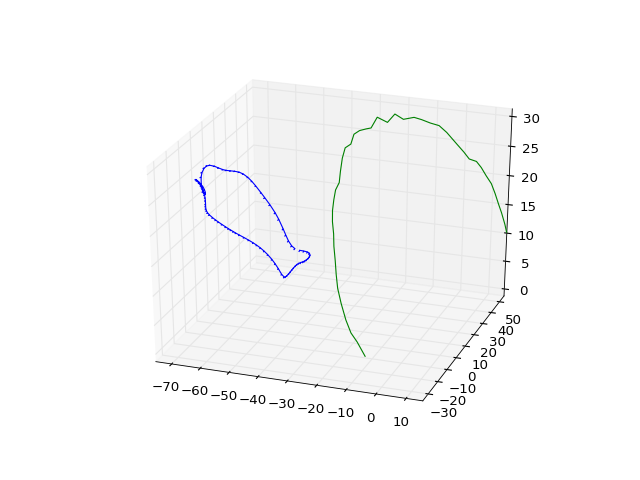

In [94]:
#Get are distance and displacements from tv to rca
dist = distance(tv_spline, rca_spline)
disp = displacement(tv_spline, rca_spline)

#From the tv, find closest rca points
min_tv_rca_points = dist.argmin(1)
nearest_tv_rca_disp = rca_spline[min_tv_rca_points, :] - tv_spline

#Plot it
quiver_spline_plot(tv_spline, rca_spline, vecs=nearest_tv_rca_disp)


In [80]:
tv_spline.shape, rca_spline.shape

((96, 3), (44, 3))

In [84]:
nearest_tv_rca_disp

array([[ 52.05, -49.84,  34.29],
       [ 52.76, -48.66,  33.62],
       [ 53.37, -47.23,  32.51],
       [ 53.85, -45.94,  31.25],
       [ 54.37, -44.87,  29.99],
       [ 55.46, -43.61,  28.12],
       [ 56.49, -43.  ,  26.93],
       [ 58.15, -42.44,  25.5 ],
       [ 59.82, -42.  ,  24.28],
       [ 51.72, -53.35,  21.57],
       [ 53.28, -52.57,  20.35],
       [ 54.39, -51.85,  19.48],
       [ 55.52, -51.09,  18.72],
       [ 56.87, -50.3 ,  18.08],
       [ 58.11, -49.76,  17.75],
       [ 59.55, -49.35,  17.61],
       [ 61.01, -49.1 ,  17.58],
       [ 62.46, -48.95,  17.56],
       [ 63.61, -48.85,  17.48],
       [ 65.17, -48.7 ,  17.25],
       [ 66.58, -48.58,  17.02],
       [ 68.24, -48.52,  16.94],
       [ 69.31, -48.59,  17.12],
       [ 70.46, -48.83,  17.63],
       [ 71.5 , -49.29,  18.54],
       [ 72.1 , -49.83,  19.49],
       [ 72.52, -50.74,  20.84],
       [ 72.68, -52.48,  22.54],
       [ 72.91, -54.59,  23.42],
       [ 73.32, -56.14,  23.6 ],
       [ 7

In [101]:
foo = np.random.random((4,4))

np.stack( , np.random.random((4,4)) )

TypeError: only length-1 arrays can be converted to Python scalars